In [4]:
import random
def gen():
    return round(random.uniform(1,10), 2)



In [19]:
MAX_IN_FRAME = 3

def addPost(postList, newPost):
    postsAhead = [p for p in postList if (p['t']<= newPost['t'] + 1 and p['t'] >= newPost['t'])]
    postsBack = [p for p in postList if (p['t'] >= newPost['t'] - 1 and p['t'] <= newPost['t'])]
    
    if (len(postsAhead) + 1 > MAX_IN_FRAME):
        print(f"Cant add newPost: {newPost}, over limit of upper group")
        return sorted(postList, key=lambda x: x['t'])
    if (len(postsBack) + 1 > MAX_IN_FRAME):
        print(f"Cant add newPost: {newPost}, over limit of lower group")
        return sorted(postList, key=lambda x: x['t'])
    
    postList.append(newPost)
    return sorted(postList, key=lambda x: x['t'])

In [20]:
def addPostMultiCheck(postList, newPost):   
    postGroup = [p for p in postList if (p['t'] >= newPost['t'] - 1 and p['t'] <= newPost['t'] + 1)]
    sortedGroup = sorted(postGroup, key=lambda x: x['t'])
    
    while len(sortedGroup) >= MAX_IN_FRAME:
        window = sortedGroup.pop(0)['t'] + 1
        if (len(list(filter(lambda p: p['t'] <= window, sortedGroup))) + 1 > MAX_IN_FRAME):
            print(f"Cant add newPost: {newPost}, over limit of group up to t: {window}")
            return sorted(postList, key=lambda x: x['t'])
    postList.append(newPost)
    return sorted(postList, key=lambda x: x['t'])

In [21]:
def checkPosts(posts):
    for post in posts:
        print(post)
        postsBack = [p for p in posts if (p['t'] >= post['t'] - 1 and p['t'] <= post['t'])]
        print(f"postsBack: {postsBack}")
        postsAhead = [p for p in posts if (p['t']<= post['t'] + 1 and p['t'] >= post['t'])]
        print(f"postsAhead: {postsAhead}")
        if(len(postsBack) > MAX_IN_FRAME):
            print(f"ERROR: post {post} over limit of lower time frame: {postsBack}")
        if(len(postsAhead) > MAX_IN_FRAME):
            print(f"ERROR: post {post} over limit of lower time frame: {postsAhead}")
        print("***********************")

In [22]:
testGroup1 = []
testGroup2 = []

for i in range(0, 20):
    newPost = {'t': gen()}
    print(f"Adding: {newPost}")
    testGroup1 = addPost(testGroup1, newPost)
    testGroup2 = addPostMultiCheck(testGroup2, newPost)
    print("------------------------------")
    

Adding: {'t': 1.04}
------------------------------
Adding: {'t': 8.62}
------------------------------
Adding: {'t': 8.17}
------------------------------
Adding: {'t': 4.08}
------------------------------
Adding: {'t': 8.95}
------------------------------
Adding: {'t': 2.51}
------------------------------
Adding: {'t': 5.43}
------------------------------
Adding: {'t': 7.01}
------------------------------
Adding: {'t': 7.09}
------------------------------
Adding: {'t': 1.31}
------------------------------
Adding: {'t': 6.59}
------------------------------
Adding: {'t': 5.01}
------------------------------
Adding: {'t': 8.73}
------------------------------
Adding: {'t': 3.68}
------------------------------
Adding: {'t': 9.67}
------------------------------
Adding: {'t': 5.36}
------------------------------
Adding: {'t': 4.35}
------------------------------
Adding: {'t': 4.78}
Cant add newPost: {'t': 4.78}, over limit of upper group
------------------------------
Adding: {'t': 1.28}
-----

In [23]:
testGroup1

[{'t': 1.04},
 {'t': 1.28},
 {'t': 1.31},
 {'t': 2.51},
 {'t': 3.68},
 {'t': 4.08},
 {'t': 4.35},
 {'t': 5.01},
 {'t': 5.36},
 {'t': 5.43},
 {'t': 6.59},
 {'t': 7.01},
 {'t': 7.09},
 {'t': 8.17},
 {'t': 8.62},
 {'t': 8.73},
 {'t': 8.95},
 {'t': 9.67}]

In [10]:
testGroup2

[{'t': 2.17},
 {'t': 2.21},
 {'t': 2.36},
 {'t': 2.56},
 {'t': 4.0},
 {'t': 4.5},
 {'t': 4.71},
 {'t': 4.8},
 {'t': 5.48},
 {'t': 5.97},
 {'t': 7.05},
 {'t': 7.07},
 {'t': 7.83},
 {'t': 7.96},
 {'t': 8.41},
 {'t': 9.13},
 {'t': 9.84},
 {'t': 9.95}]

(0.0, 10.0)

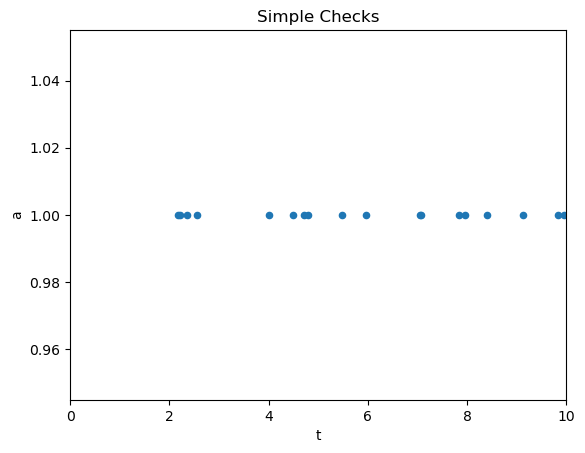

In [12]:
import pandas as pd
formatted = [{**x, 'a': 1} for x in testGroup1]
formatted
df = pd.DataFrame(data=formatted)
ax = df.plot.scatter(x='t', y='a', title='Simple Checks')
ax.set_xlim(0, 10)

In [15]:
checkPosts(testGroup1)

{'t': 2.17}
postsBack: [{'t': 2.17}]
postsAhead: [{'t': 2.17}, {'t': 2.21}, {'t': 2.36}, {'t': 2.56}]
ERROR: post {'t': 2.17} over limit of lower time frame: [{'t': 2.17}, {'t': 2.21}, {'t': 2.36}, {'t': 2.56}]
***********************
{'t': 2.21}
postsBack: [{'t': 2.17}, {'t': 2.21}]
postsAhead: [{'t': 2.21}, {'t': 2.36}, {'t': 2.56}]
***********************
{'t': 2.36}
postsBack: [{'t': 2.17}, {'t': 2.21}, {'t': 2.36}]
postsAhead: [{'t': 2.36}, {'t': 2.56}]
***********************
{'t': 2.56}
postsBack: [{'t': 2.17}, {'t': 2.21}, {'t': 2.36}, {'t': 2.56}]
postsAhead: [{'t': 2.56}]
ERROR: post {'t': 2.56} over limit of lower time frame: [{'t': 2.17}, {'t': 2.21}, {'t': 2.36}, {'t': 2.56}]
***********************
{'t': 4.0}
postsBack: [{'t': 4.0}]
postsAhead: [{'t': 4.0}, {'t': 4.5}, {'t': 4.71}, {'t': 4.8}]
ERROR: post {'t': 4.0} over limit of lower time frame: [{'t': 4.0}, {'t': 4.5}, {'t': 4.71}, {'t': 4.8}]
***********************
{'t': 4.5}
postsBack: [{'t': 4.0}, {'t': 4.5}]
posts

(0.0, 10.0)

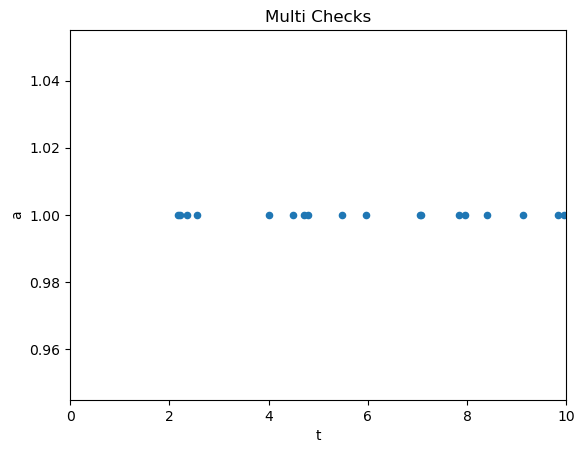

In [17]:
formatted = [{**x, 'a': 1} for x in testGroup2]
formatted
df = pd.DataFrame(data=formatted)
ax = df.plot.scatter(x='t', y='a', title='Multi Checks')
ax.set_xlim(0, 10)

In [18]:
checkPosts(testGroup2)

{'t': 2.17}
postsBack: [{'t': 2.17}]
postsAhead: [{'t': 2.17}, {'t': 2.21}, {'t': 2.36}, {'t': 2.56}]
ERROR: post {'t': 2.17} over limit of lower time frame: [{'t': 2.17}, {'t': 2.21}, {'t': 2.36}, {'t': 2.56}]
***********************
{'t': 2.21}
postsBack: [{'t': 2.17}, {'t': 2.21}]
postsAhead: [{'t': 2.21}, {'t': 2.36}, {'t': 2.56}]
***********************
{'t': 2.36}
postsBack: [{'t': 2.17}, {'t': 2.21}, {'t': 2.36}]
postsAhead: [{'t': 2.36}, {'t': 2.56}]
***********************
{'t': 2.56}
postsBack: [{'t': 2.17}, {'t': 2.21}, {'t': 2.36}, {'t': 2.56}]
postsAhead: [{'t': 2.56}]
ERROR: post {'t': 2.56} over limit of lower time frame: [{'t': 2.17}, {'t': 2.21}, {'t': 2.36}, {'t': 2.56}]
***********************
{'t': 4.0}
postsBack: [{'t': 4.0}]
postsAhead: [{'t': 4.0}, {'t': 4.5}, {'t': 4.71}, {'t': 4.8}]
ERROR: post {'t': 4.0} over limit of lower time frame: [{'t': 4.0}, {'t': 4.5}, {'t': 4.71}, {'t': 4.8}]
***********************
{'t': 4.5}
postsBack: [{'t': 4.0}, {'t': 4.5}]
posts